In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')


In [3]:
print(data.head())


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


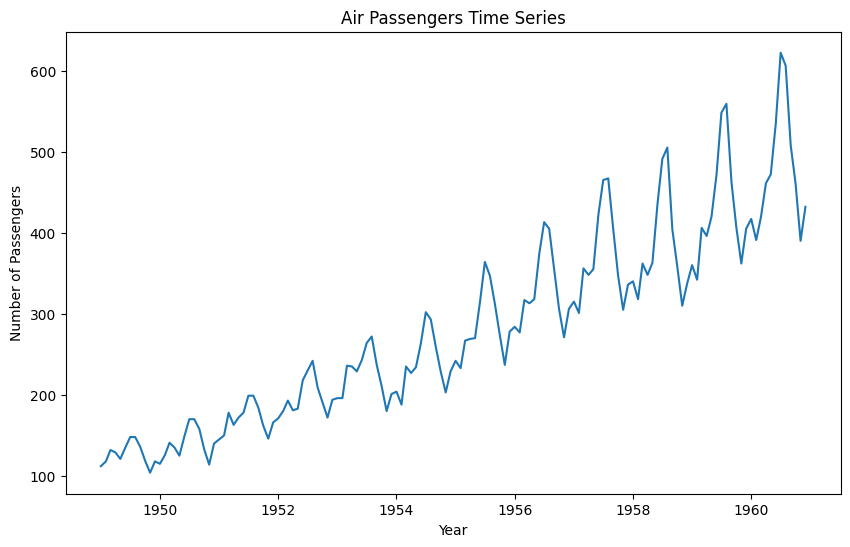

Training set size: 115
Testing set size: 29


In [4]:
# Convert 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' column as index
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data.iloc[:train_size], data.iloc[train_size:]

print("Training set size:", len(train))
print("Testing set size:", len(test))


In [5]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


In [6]:
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

# Define the lookback window size
lookback = 12

# Create training and testing sequences
X_train, y_train = create_sequences(train_scaled, lookback)
X_test, y_test = create_sequences(test_scaled, lookback)

# Reshape input data to be 3D (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [7]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
4/4 [==============================] - 3s 204ms/step - loss: 0.2309 - val_loss: 0.8174
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.1515 - val_loss: 0.5377
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0871 - val_loss: 0.3014
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0412 - val_loss: 0.1200
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0184 - val_loss: 0.0434
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0220 - val_loss: 0.0453
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0238 - val_loss: 0.0427
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0165 - val_loss: 0.0587
Epoch 9/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0144 - val_loss: 0.0746
Epoch 10/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0153 - val_loss: 0.0769
Epoch 11/100
4/4 [

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
4/4 [==============================] - 0s 140ms/step - loss: 0.0066 - val_loss: 0.0233
Epoch 2/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0060 - val_loss: 0.0326
Epoch 3/100
4/4 [==============================] - 0s 90ms/step - loss: 0.0066 - val_loss: 0.0261
Epoch 4/100
4/4 [==============================] - 0s 60ms/step - loss: 0.0059 - val_loss: 0.0210
Epoch 5/100
4/4 [==============================] - 0s 55ms/step - loss: 0.0060 - val_loss: 0.0223
Epoch 6/100
4/4 [==============================] - 0s 62ms/step - loss: 0.0055 - val_loss: 0.0307
Epoch 7/100
4/4 [==============================] - 0s 87ms/step - loss: 0.0063 - val_loss: 0.0249
Epoch 8/100
4/4 [==============================] - 0s 67ms/step - loss: 0.0055 - val_loss: 0.0202
Epoch 9/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0055 - val_loss: 0.0262
Epoch 10/100
4/4 [==============================] - 0s 68ms/step - loss: 0.0063 - val_loss: 0.0325
Epoch 11/100
4/4 [

In [9]:
# Predict on testing data
y_pred = model.predict(X_test)

# Invert scaling to get original values
y_pred = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE and RMSE
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


1/1 [==============================] - 1s 617ms/step
Mean Squared Error (MSE): 6676.900394218535
Root Mean Squared Error (RMSE): 81.71230258791228


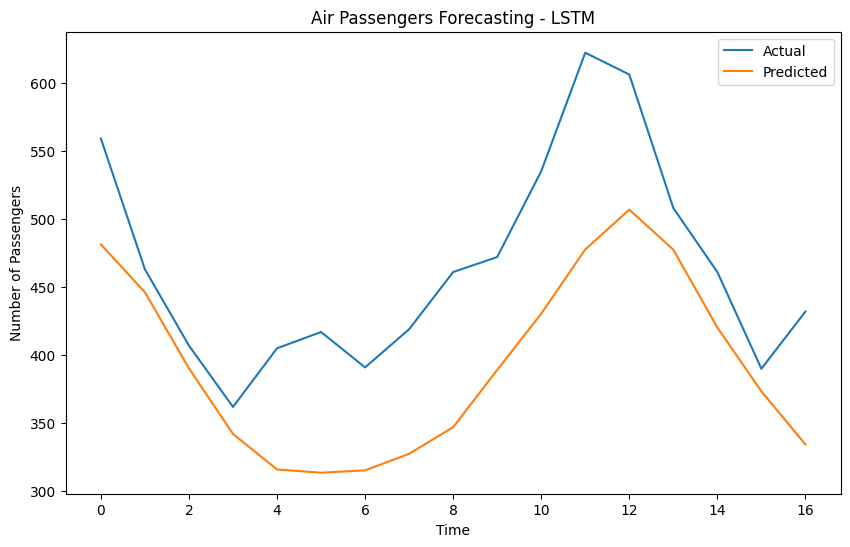

In [10]:
# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Air Passengers Forecasting - LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


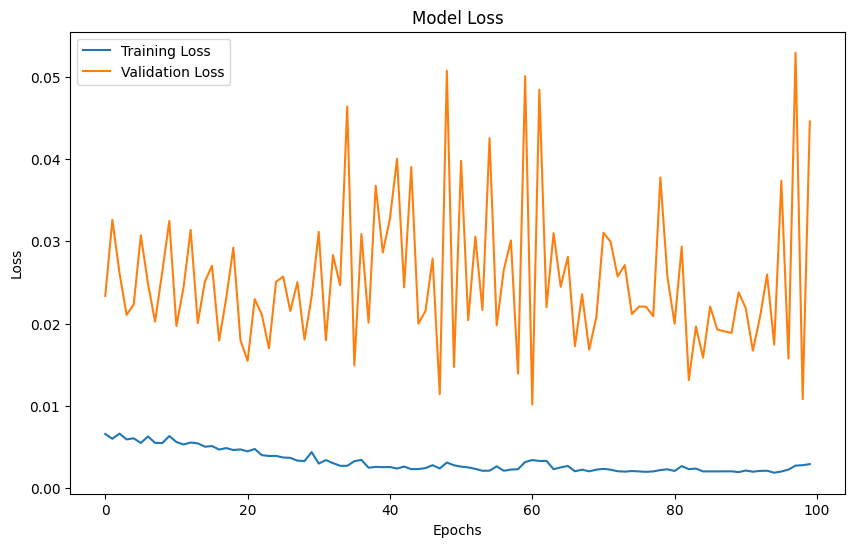

In [11]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


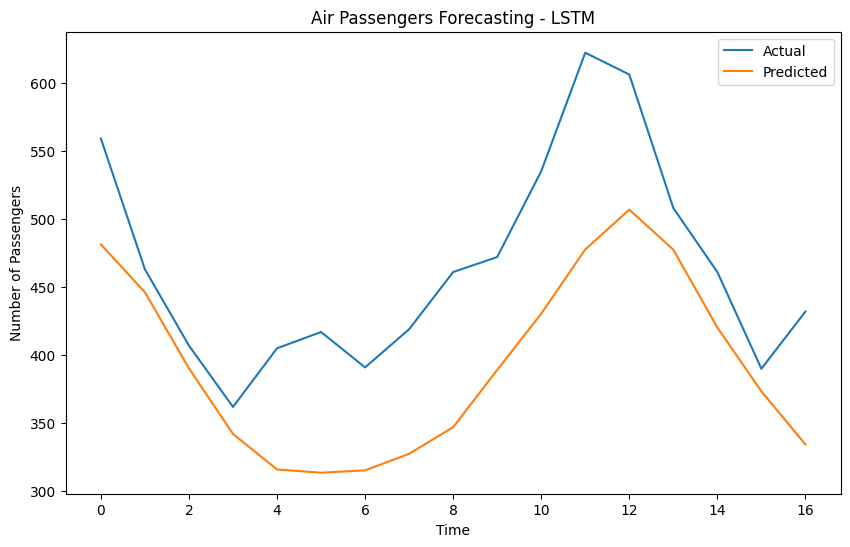

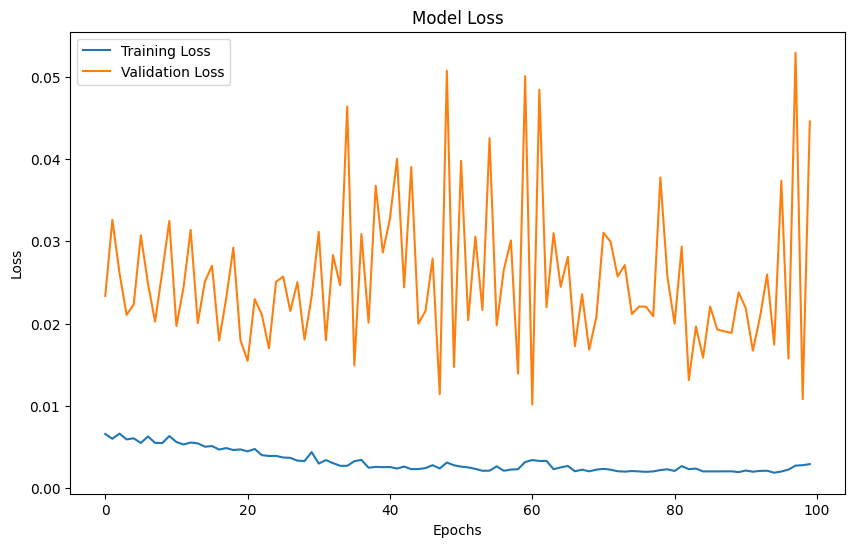

In [12]:
# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Air Passengers Forecasting - LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
#Image Classification

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 [==============================] - 1s 0us/step


In [15]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/10
469/469 [==============================] - 51s 105ms/step - loss: 0.2260 - accuracy: 0.9353 - val_loss: 0.0630 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0464 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0391 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0314 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0324 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0354 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 7/10
469/469 [==============================] 

313/313 [==============================] - 4s 13ms/step - loss: 0.0267 - accuracy: 0.9923
Test Loss: 0.026690304279327393
Test Accuracy: 0.9922999739646912


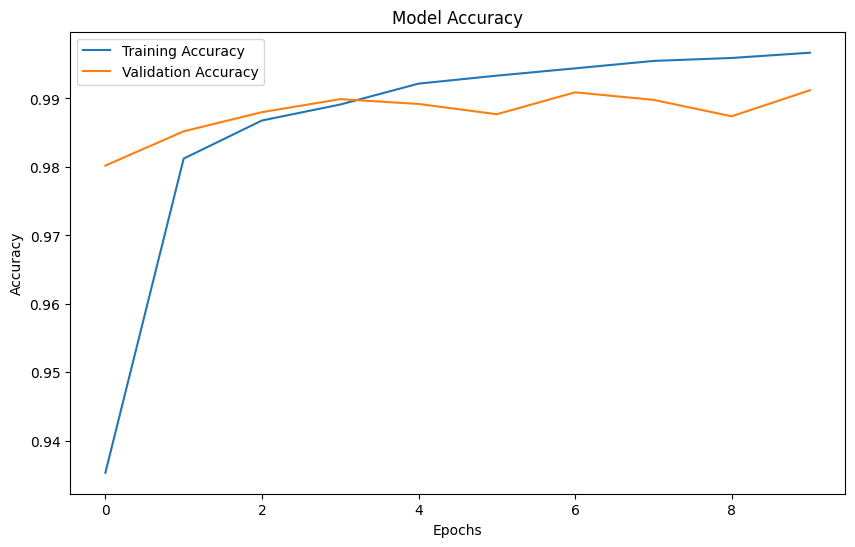

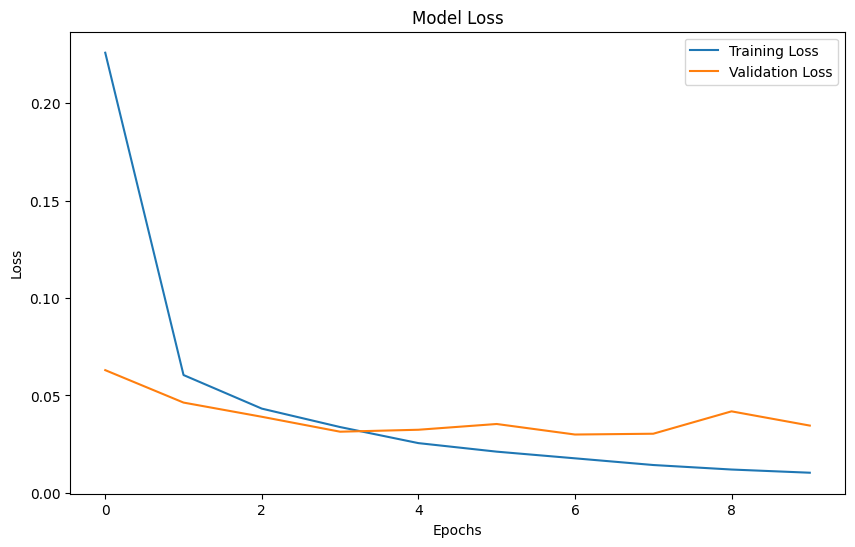

In [18]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 3s 11ms/step - loss: 0.0267 - accuracy: 0.9923
Test Loss: 0.026690304279327393
Test Accuracy: 0.9922999739646912


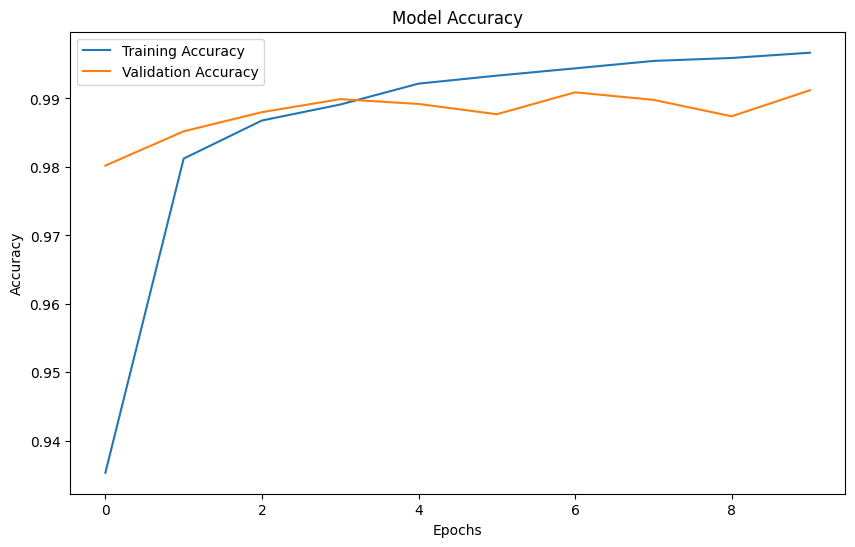

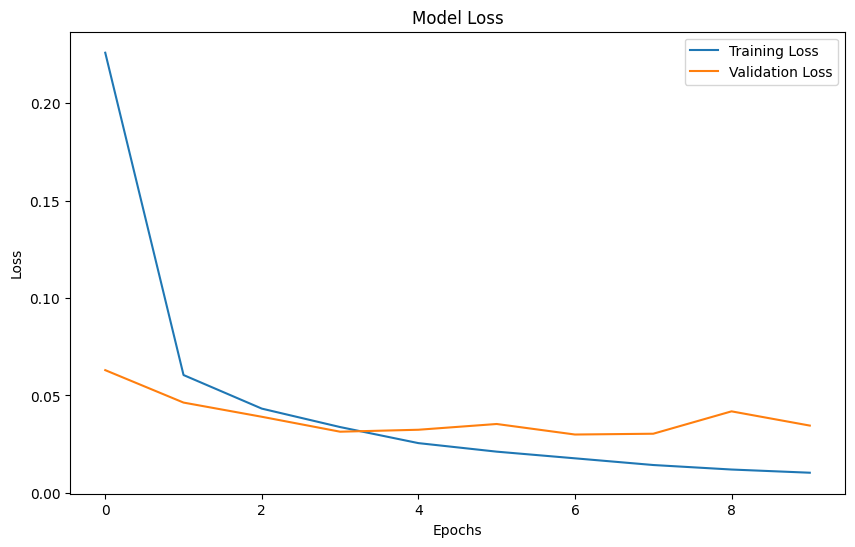

In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
